案例：ageinc

# 1 数据概况

In [2]:
#导入模块和数据
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ageinc = pd.read_csv('ageinc.csv')
ageinc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   income  1000 non-null   int64
 1   age     1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


数据完整，无缺失值

In [3]:
#查看具体情况
ageinc.describe()

,income,age
count,1000.00000,1000.000000
mean,80116.81800,39.410000
std,39262.33567,10.976811
min,0.00000,18.000000
25%,46402.25000,30.000000
50%,78993.50000,39.000000
75%,114810.50000,49.000000
max,179294.00000,63.000000


# 2 单变量分析

### Z评分是将数据标准化的方式：
- Z评分 = （数据集-数据集的均值）/数据集的标准差
- Z评分 = (dataframe - dataframe.mean())/dataframe.std()

In [7]:
#income的Z评分
ageinc['z_income'] = (ageinc['income'] - ageinc['income'].mean())/ageinc['income'].std()

In [8]:
#age的Z评分
ageinc['z_age'] = (ageinc['age'] - ageinc['age'].mean())/ageinc['age'].std()

In [9]:
#查看具体情况
ageinc.describe()

,income,age,z_income,z_age
count,1000.00000,1000.000000,1.000000e+03,1.000000e+03
mean,80116.81800,39.410000,2.842171e-17,2.906009e-16
std,39262.33567,10.976811,1.000000e+00,1.000000e+00
min,0.00000,18.000000,-2.040552e+00,-1.950475e+00
25%,46402.25000,30.000000,-8.587000e-01,-8.572617e-01
50%,78993.50000,39.000000,-2.861058e-02,-3.735147e-02
75%,114810.50000,49.000000,8.836378e-01,8.736599e-01
max,179294.00000,63.000000,2.526013e+00,2.149076e+00


# 3 数据可视化

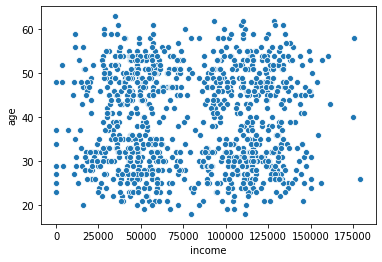

In [12]:
#查看income和age的关系
sns.scatterplot(x = 'income', y = 'age', data = ageinc)

发现可能有4个群体

# 4 聚类分析

In [22]:
#导入sklearn的cluster模块
from sklearn import cluster
model = cluster.KMeans(n_clusters = 4, init = 'k-means++', random_state = 100)
#用标准化后的income和age来拟合模型
model.fit(ageinc[['z_income', 'z_age']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [24]:
#model.labels_ 给用户建立标签
ageinc['cluster'] = model.labels_
ageinc.head(10)

,income,age,z_income,z_age,cluster
0,101743,58,0.550812,1.693570,1
1,49597,27,-0.777331,-1.130565,0
2,36517,52,-1.110474,1.146963,3
3,33223,49,-1.194372,0.873660,3
4,72994,53,-0.181416,1.238064,3
5,38361,26,-1.063508,-1.221666,0
6,48579,29,-0.803259,-0.948363,0
7,115248,24,0.894781,-1.403869,2
8,11527,31,-1.746962,-0.766161,0
9,54096,51,-0.662742,1.055862,3


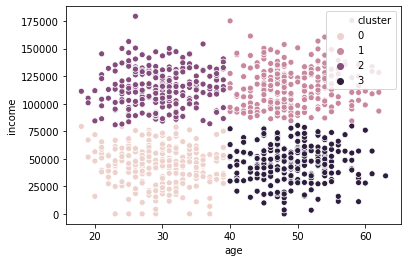

In [25]:
#将分群结果可视化
sns.scatterplot(x = 'age', y = 'income', hue = 'cluster', data = ageinc)

In [26]:
#查看不同cluster用户的income
ageinc.groupby(['cluster'])['income'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,248.0,43699.213710,17463.882999,0.0,31967.50,45212.5,56248.00,79360.0
1,238.0,116199.844538,18110.799585,84364.0,100752.25,115183.0,127515.25,175497.0
2,258.0,115210.709302,16802.768499,80820.0,104076.00,114943.5,127979.25,179294.0
3,256.0,46482.371094,16357.141893,0.0,35781.75,47520.0,57161.75,80243.0


In [27]:
#查看不同cluster用户的age
ageinc.groupby(['cluster'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,248.0,29.625000,4.857535,18.0,26.0,30.0,33.0,39.0
1,238.0,49.399160,5.142312,40.0,46.0,48.0,53.0,62.0
2,258.0,29.748062,4.674887,18.0,26.0,30.0,33.0,39.0
3,256.0,49.339844,4.784548,40.0,46.0,49.0,53.0,63.0


### 当分析用户为4层时，各层用户数据：
- income分为两档，一档0 - 8w，另一档8 - 18w
- age也分为两档，0和2为18 - 39岁中青年，1和3为40 - 63岁中老年